<a href="https://colab.research.google.com/github/swarthyPig/Raspberry-Pi_DHT22_Weather_Station_with_correlation-and-AI/blob/master/data%20mining/dataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas import DataFrame
import numpy as np


url = "http://175.199.157.52:3030/iot"
jd = pd.read_json(url)

iot_data = jd[['date', 'temperature', 'humidity']]

iot_data['temperature'] = pd.to_numeric(iot_data['temperature'])
iot_data['humidity'] = pd.to_numeric(iot_data['humidity'])
iot_data.set_index(iot_data['date'],inplace=True)

iot_data['temperature'] = iot_data['temperature'] + np.random.rand(len(iot_data))/1000

data_new = {'date_avg':[],
            'temperature_avg':[],
            'humidity_avg': [],
            'correlation': []
           }

df = DataFrame(data_new, columns=['date_avg','temperature_avg', 'humidity_avg', 'correlation']) 

length = len(jd)
data_length = 10
k = 0
q = 1

temp_avg=list(iot_data['temperature'].rolling(data_length).mean()) 
humi_avg=list(iot_data['humidity'].rolling(data_length).mean())
correlation_value=list((iot_data['temperature']).rolling(data_length).corr(iot_data['humidity']))

for i in range(9,length,10):
    df.loc[k,['temperature_avg']] = round(temp_avg[i],2) # 9, 19, 29, 39, 49
    df.loc[k,['humidity_avg']] = humi_avg[i]
    df.loc[k,['correlation']] = correlation_value[i]
    k += 1
    
for j in range(9,length-9,10 ): # 0, 9, 19, 29
    
    df.loc[0,['date_avg']] = iot_data['date'][0] # 0, 9, 19, 29
    df.loc[q,['date_avg']] = iot_data['date'][j] # 0, 9, 19, 29
   
    q += 1
    

df['date_avg'] = pd.to_datetime(df['date_avg'])
df.set_index('date_avg',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
np.isinf(correlation_value).sum()

0

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2525 entries, 2019-03-26 04:51:29.096000 to 2019-03-26 23:35:49.033000
Data columns (total 3 columns):
temperature_avg    2524 non-null float64
humidity_avg       2524 non-null float64
correlation        2524 non-null float64
dtypes: float64(3)
memory usage: 78.9 KB


In [0]:
df.head()

,temperature_avg,humidity_avg,correlation
date_avg,,,
2019-03-26 04:51:29.096,21.5,43.31,0.537887
2019-03-26 04:51:56.113,21.5,43.19,0.444189
2019-03-26 04:52:26.127,21.5,43.28,0.195589
2019-03-26 04:52:56.141,21.5,43.40,-0.332460
2019-03-26 04:53:26.162,21.5,43.40,0.577970


In [0]:
df.tail()

,temperature_avg,humidity_avg,correlation
date_avg,,,
2019-03-26 23:33:45.964,28.20,23.44,0.632666
2019-03-26 23:34:15.984,28.20,23.28,0.531066
2019-03-26 23:34:45.998,28.33,23.31,0.624276
2019-03-26 23:35:16.012,28.39,22.97,-0.327761
2019-03-26 23:35:49.033,28.36,23.05,-0.312644


In [0]:
df

,temperature_avg,humidity_avg,correlation
date_avg,,,
2019-03-26 04:51:29.096,21.50,43.31,0.537887
2019-03-26 04:51:56.113,21.50,43.19,0.444189
2019-03-26 04:52:26.127,21.50,43.28,0.195589
2019-03-26 04:52:56.141,21.50,43.40,-0.332460
2019-03-26 04:53:26.162,21.50,43.40,0.577970
2019-03-26 04:53:56.185,21.50,43.44,0.388514
2019-03-26 04:54:26.207,21.50,42.63,-0.306949
2019-03-26 04:39:16.692,21.50,42.59,-0.429538
2019-03-26 04:39:37.706,21.50,42.65,-0.066060


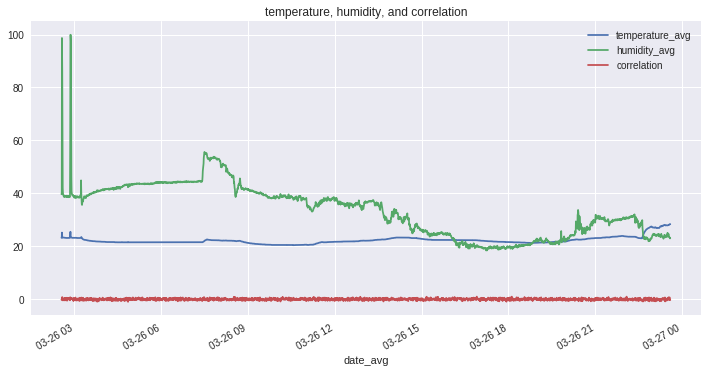

In [0]:
df.plot(figsize=(12,6), title='temperature, humidity, and correlation')

In [0]:
df[['temperature_avg','humidity_avg','correlation']].mean()

temperature_avg    22.228360
humidity_avg       33.504838
correlation        -0.009612
dtype: float64

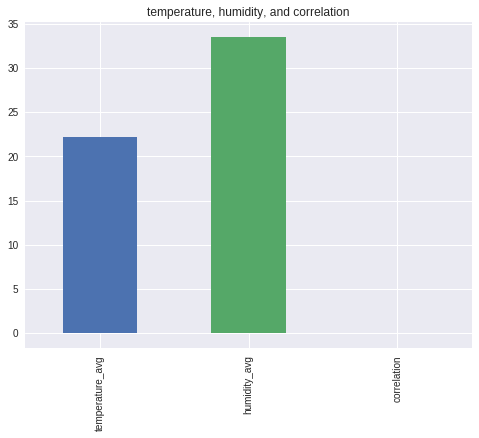

In [0]:
df.mean().plot.bar(figsize=(8,6), title="temperature, humidity, and correlation")

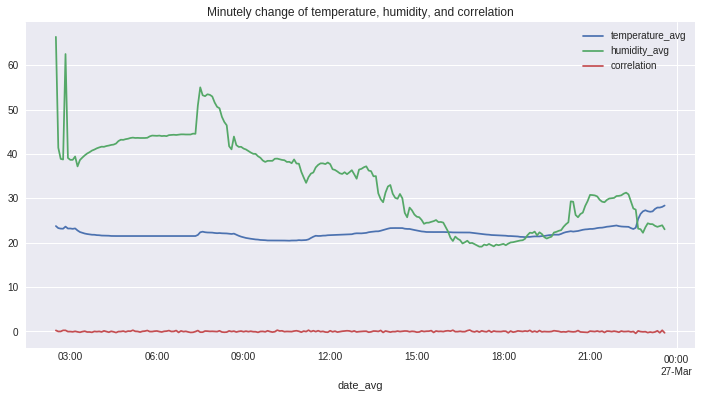

In [0]:
#  Plot mean of the iot data per every minute
df.resample('300S').mean().plot(figsize=(12,6), title='Minutely change of temperature, humidity, and correlation')

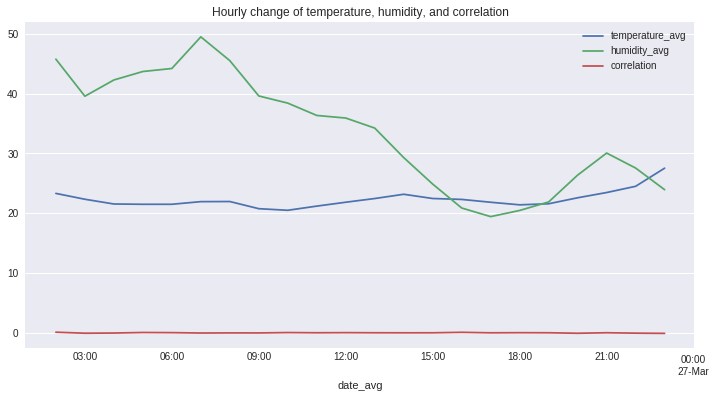

In [0]:
df.resample('H').mean().plot(figsize=(12,6), title='Hourly change of temperature, humidity, and correlation')

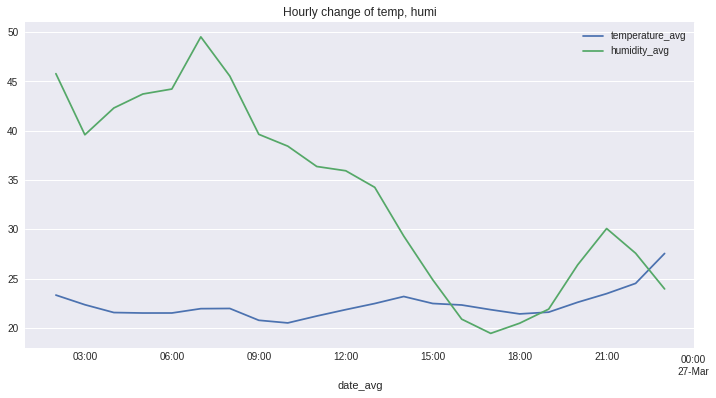

In [0]:
df[['temperature_avg','humidity_avg']].resample('H').mean().plot(figsize=(12,6), title='Hourly change of temp, humi')

In [0]:
import matplotlib.pyplot as plt

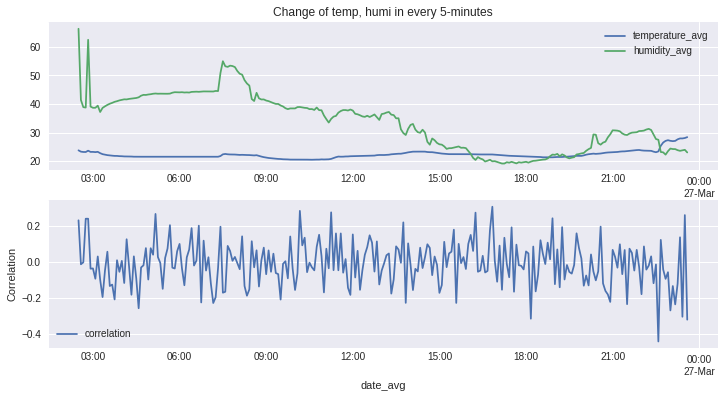

In [0]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)
ax2.set_ylabel('Correlation')
#  Plot mean of the iot data per every 5 minutes
df[['temperature_avg','humidity_avg']].resample('300S').mean().plot(figsize=(12,6), title='Change of temp, humi in every 5-minutes', ax=ax1)
df[['correlation']].resample('300S').mean().plot(figsize=(12,6), ax=ax2)

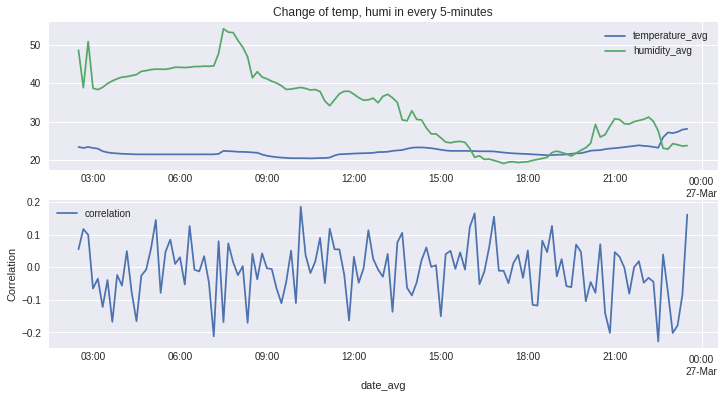

In [0]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)
ax2.set_ylabel('Correlation')
#  Plot mean of the iot data per every 5 minutes
df[['temperature_avg','humidity_avg']].resample('600S').mean().plot(figsize=(12,6), title='Change of temp, humi in every 5-minutes', ax=ax1)
df[['correlation']].resample('600S').mean().plot(figsize=(12,6), ax=ax2)

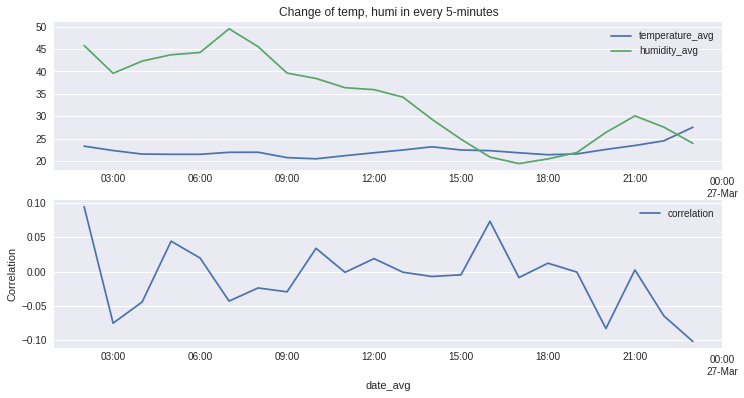

In [0]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)
ax2.set_ylabel('Correlation')
#  Plot mean of the iot data per every 5 minutes
df[['temperature_avg','humidity_avg']].resample('H').mean().plot(figsize=(12,6), title='Change of temp, humi in every 5-minutes', ax=ax1)
df[['correlation']].resample('H').mean().plot(figsize=(12,6), ax=ax2)